<a href="https://colab.research.google.com/github/Elavat9000/TelecomX_LATAM_challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

###  Carga el JSON desde el archivo en GitHub







In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [ ]:
datos = pd.read_json(url)
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [ ]:
df_customer = pd.json_normalize(datos['customer'])
df_phone = pd.json_normalize(datos['phone'])
df_internet = pd.json_normalize(datos['internet'])
df_account = pd.json_normalize(datos['account'])

df = pd.concat([datos[['customerID','Churn']],df_customer, df_phone, df_internet, df_account], axis=1)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##Conocer contenido de columnas

In [ ]:
columnasnumericas = [
    'Churn', 'gender', 'SeniorCitizen','Partner', 'Dependents',
    'PhoneService','InternetService', 'MultipleLines', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'PaymentMethod', 'Contract','OnlineSecurity']

In [ ]:
for col in columnasnumericas:
    print(f"{col}: {df[col].unique()}")

Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
InternetService: ['DSL' 'Fiber optic' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Contract: ['One year' 'Month-to-month' 'Two year']
OnlineSecurity: ['No' 'Yes' 'No internet service']


##Convierte en float los numero de charges total y quita espacion en blanco

In [ ]:
import numpy as np

In [ ]:
df['Charges.Total'] = df['Charges.Total'].str.replace(' ', '', regex=True)
df['Charges.Total'] = df['Charges.Total'].replace('', np.nan)
df['Charges.Total'] = df['Charges.Total'].astype(float)
df['Charges.Total'].isnull().sum()

np.int64(11)

In [ ]:
df['Charges.Total'] = df['Charges.Total'].fillna(0)
df['Charges.Total'].isnull().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


##Limpia churn quitando el espacio en blanco

In [ ]:
df_clean = df.query("Churn != ''")
df = df_clean
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

##Convierte las letras en minusculas y quita guiones medios

In [ ]:
df[['customerID','gender', 'InternetService', 'Contract', 'PaymentMethod']] = df[['customerID','gender', 'InternetService', 'Contract', 'PaymentMethod']].apply(lambda col: col.str.lower())
df.head()

<ipython-input-12-d42d48a62c3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['customerID','gender', 'InternetService', 'Contract', 'PaymentMethod']] = df[['customerID','gender', 'InternetService', 'Contract', 'PaymentMethod']].apply(lambda col: col.str.lower())


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-orfbo,No,female,0,Yes,Yes,9,Yes,No,dsl,...,Yes,No,Yes,Yes,No,one year,Yes,mailed check,65.6,593.30
1,0003-mknfe,No,male,0,No,No,9,Yes,Yes,dsl,...,No,No,No,No,Yes,month-to-month,No,mailed check,59.9,542.40
2,0004-tlhlj,Yes,male,0,No,No,4,Yes,No,fiber optic,...,No,Yes,No,No,No,month-to-month,Yes,electronic check,73.9,280.85
3,0011-igkff,Yes,male,1,Yes,No,13,Yes,No,fiber optic,...,Yes,Yes,No,Yes,Yes,month-to-month,Yes,electronic check,98.0,1237.85
4,0013-exchz,Yes,female,1,Yes,No,3,Yes,No,fiber optic,...,No,No,Yes,Yes,No,month-to-month,Yes,mailed check,83.9,267.40


In [ ]:
df[['customerID','gender', 'InternetService', 'PaymentMethod']] = df[['customerID','gender', 'InternetService', 'PaymentMethod']].applymap(lambda x: x.replace('-','').replace(',',''.strip()))
df['Contract'] = df['Contract'].apply(lambda x: x.replace('-',' '))
df.head()

<ipython-input-13-2a64c2106757>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['customerID','gender', 'InternetService', 'PaymentMethod']] = df[['customerID','gender', 'InternetService', 'PaymentMethod']].applymap(lambda x: x.replace('-','').replace(',',''.strip()))


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002orfbo,No,female,0,Yes,Yes,9,Yes,No,dsl,...,Yes,No,Yes,Yes,No,one year,Yes,mailed check,65.6,593.30
1,0003mknfe,No,male,0,No,No,9,Yes,Yes,dsl,...,No,No,No,No,Yes,month to month,No,mailed check,59.9,542.40
2,0004tlhlj,Yes,male,0,No,No,4,Yes,No,fiber optic,...,No,Yes,No,No,No,month to month,Yes,electronic check,73.9,280.85
3,0011igkff,Yes,male,1,Yes,No,13,Yes,No,fiber optic,...,Yes,Yes,No,Yes,Yes,month to month,Yes,electronic check,98.0,1237.85
4,0013exchz,Yes,female,1,Yes,No,3,Yes,No,fiber optic,...,No,No,Yes,Yes,No,month to month,Yes,mailed check,83.9,267.40


## Mapea contenido para analisis


In [ ]:
df['gender'] = df['gender'].map({'male': 0, 'female': 1})
df['InternetService'] = df['InternetService'].map({'no': 0, 'dsl': 1, 'fiber optic': 2})
df['Contract'] = df['Contract'].map({'month to month': 0, 'one year': 1, 'two year': 2})

In [ ]:
cols_binarias = ['Churn','Partner','Dependents','PhoneService','PaperlessBilling']

df[cols_binarias] = df[cols_binarias].replace({'Yes':1, 'No':0})


<ipython-input-15-8782ced08766>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_binarias] = df[cols_binarias].replace({'Yes':1, 'No':0})


In [ ]:
mapeo_servicios = {
    'No': 0,
    'Yes': 1,
    'No internet service': 0,
    'No phone service': 0
}
columnas_servicios = ['MultipleLines', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','OnlineSecurity']

for col in columnas_servicios:
    df[col] = df[col].map(mapeo_servicios)

In [ ]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002orfbo,0,1,0,1,1,9,1,0,1,...,1,0,1,1,0,1,1,mailed check,65.6,593.30
1,0003mknfe,0,0,0,0,0,9,1,1,1,...,0,0,0,0,1,0,0,mailed check,59.9,542.40
2,0004tlhlj,1,0,0,0,0,4,1,0,2,...,0,1,0,0,0,0,1,electronic check,73.9,280.85
3,0011igkff,1,0,1,1,0,13,1,0,2,...,1,1,0,1,1,0,1,electronic check,98.0,1237.85
4,0013exchz,1,1,1,1,0,3,1,0,2,...,0,0,1,1,0,0,1,mailed check,83.9,267.40


In [ ]:
for col in columnasnumericas:
    print(f"{col}: {df[col].unique()}")

Churn: [0 1]
gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [1 0]
PhoneService: [1 0]
InternetService: [1 2 0]
MultipleLines: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [1 0]
StreamingTV: [1 0]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
PaymentMethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']
Contract: [1 0 2]
OnlineSecurity: [0 1]


##Creacion de cuentas diarias

In [ ]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30

In [ ]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002orfbo,0,1,0,1,1,9,1,0,1,...,0,1,1,0,1,1,mailed check,65.6,593.30,2.186667
1,0003mknfe,0,0,0,0,0,9,1,1,1,...,0,0,0,1,0,0,mailed check,59.9,542.40,1.996667
2,0004tlhlj,1,0,0,0,0,4,1,0,2,...,1,0,0,0,0,1,electronic check,73.9,280.85,2.463333
3,0011igkff,1,0,1,1,0,13,1,0,2,...,1,0,1,1,0,1,electronic check,98.0,1237.85,3.266667
4,0013exchz,1,1,1,1,0,3,1,0,2,...,0,1,1,0,0,1,mailed check,83.9,267.40,2.796667


##Creacion de mas tablas a partir de PaymentMethod, para simplificar analisis

In [ ]:
df = pd.get_dummies(df, columns=['PaymentMethod'])

In [ ]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingMovies,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0002orfbo,0,1,0,1,1,9,1,0,1,...,0,1,1,65.6,593.30,2.186667,False,False,False,True
1,0003mknfe,0,0,0,0,0,9,1,1,1,...,1,0,0,59.9,542.40,1.996667,False,False,False,True
2,0004tlhlj,1,0,0,0,0,4,1,0,2,...,0,0,1,73.9,280.85,2.463333,False,False,True,False
3,0011igkff,1,0,1,1,0,13,1,0,2,...,1,0,1,98.0,1237.85,3.266667,False,False,True,False
4,0013exchz,1,1,1,1,0,3,1,0,2,...,0,0,1,83.9,267.40,2.796667,False,False,False,True


In [ ]:
df[['PaymentMethod_mailed check',
    'PaymentMethod_bank transfer (automatic)',
      'PaymentMethod_credit card (automatic)',
      'PaymentMethod_electronic check']].sum()

,0
PaymentMethod_mailed check,1612
PaymentMethod_bank transfer (automatic),1544
PaymentMethod_credit card (automatic),1522
PaymentMethod_electronic check,2365


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   Churn                                    7043 non-null   int64  
 2   gender                                   7043 non-null   int64  
 3   SeniorCitizen                            7043 non-null   int64  
 4   Partner                                  7043 non-null   int64  
 5   Dependents                               7043 non-null   int64  
 6   tenure                                   7043 non-null   int64  
 7   PhoneService                             7043 non-null   int64  
 8   MultipleLines                            7043 non-null   int64  
 9   InternetService                          7043 non-null   int64  
 10  OnlineSecurity                           7043 non-nul

In [ ]:
servicios = ['OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'OnlineBackup', 'DeviceProtection', 'PhoneService', 'MultipleLines']


df['ServiciosContratados'] = df[servicios].sum(axis=1)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check,ServiciosContratados
0,0002orfbo,0,1,0,1,1,9,1,0,1,...,1,1,65.6,593.30,2.186667,False,False,False,True,4
1,0003mknfe,0,0,0,0,0,9,1,1,1,...,0,0,59.9,542.40,1.996667,False,False,False,True,3
2,0004tlhlj,1,0,0,0,0,4,1,0,2,...,0,1,73.9,280.85,2.463333,False,False,True,False,2
3,0011igkff,1,0,1,1,0,13,1,0,2,...,0,1,98.0,1237.85,3.266667,False,False,True,False,5
4,0013exchz,1,1,1,1,0,3,1,0,2,...,0,1,83.9,267.40,2.796667,False,False,False,True,3


In [ ]:
df['ServiciosContratados'].sample(20)

,ServiciosContratados
2368,1
5068,1
5216,3
6289,2
2529,4
2708,1
6749,2
2926,5
5074,1
2791,7


#📊 Carga y análisis

##Análisis exploratorio inicial

###Análisis Descriptivo

In [ ]:
df.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,ServiciosContratados
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,1.222916,0.286668,...,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,64.761692,2279.734304,2.158723,3.362914
std,0.441561,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.778877,0.452237,...,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,30.090047,2266.794470,1.003002,2.062031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.183333,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.345000,3.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.995000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,118.750000,8684.800000,3.958333,8.000000


### Distribución de evasión (Clientes que cancelaron vs no)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

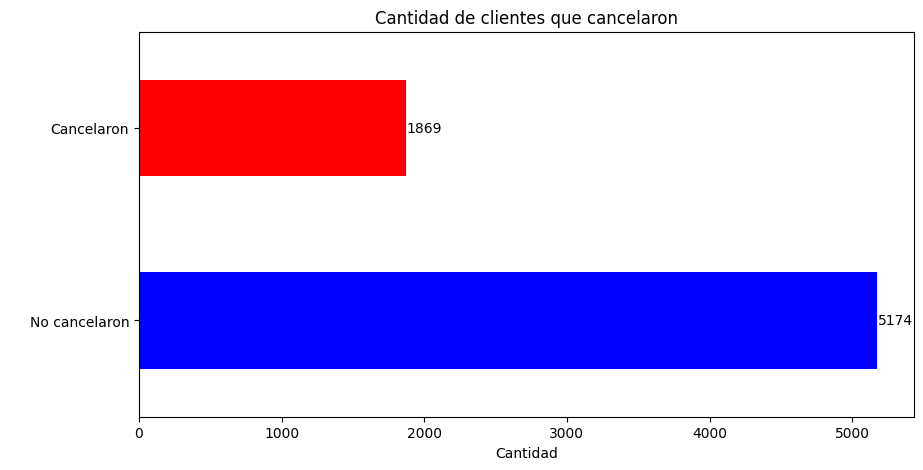

In [ ]:
conteo = df['Churn'].value_counts().rename(index={0: 'No cancelaron', 1: 'Cancelaron'})

fig, ax = plt.subplots(figsize=(10,5))
conteo.plot(kind='barh', ax=ax, color=['blue', 'red'])
plt.title('Cantidad de clientes que cancelaron')
ax.set_xlabel('Cantidad')
ax.set_ylabel(' ')

# Mostrar los números al lado de cada barra
for i, (valor) in enumerate(conteo):
    ax.text(valor + 5, i, str(valor), color='black', fontsize=10, va='center')

fig.savefig('distribucion_cancelacion.png',transparent=False,dpi=300,bbox_inches='tight')

plt.show()


####Evasión de clientes según Genero, Servicio de Internet, Tipo de contrato

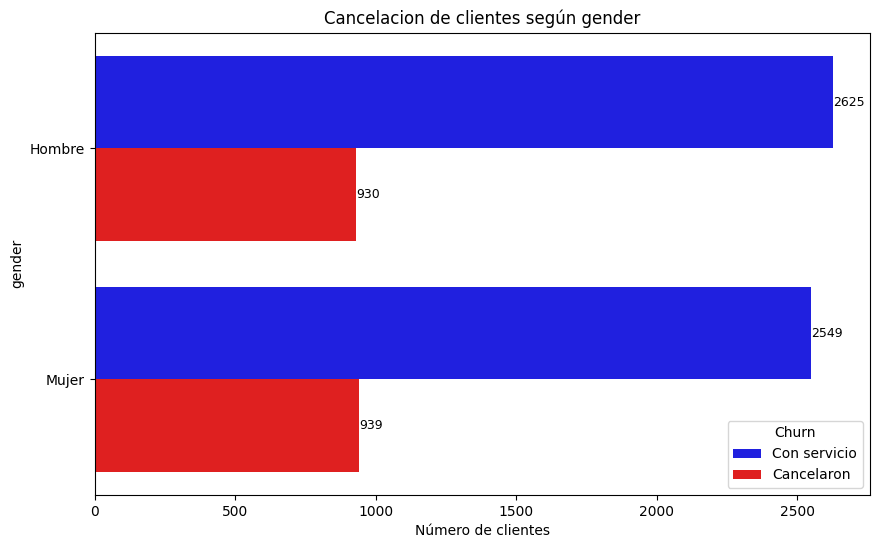


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



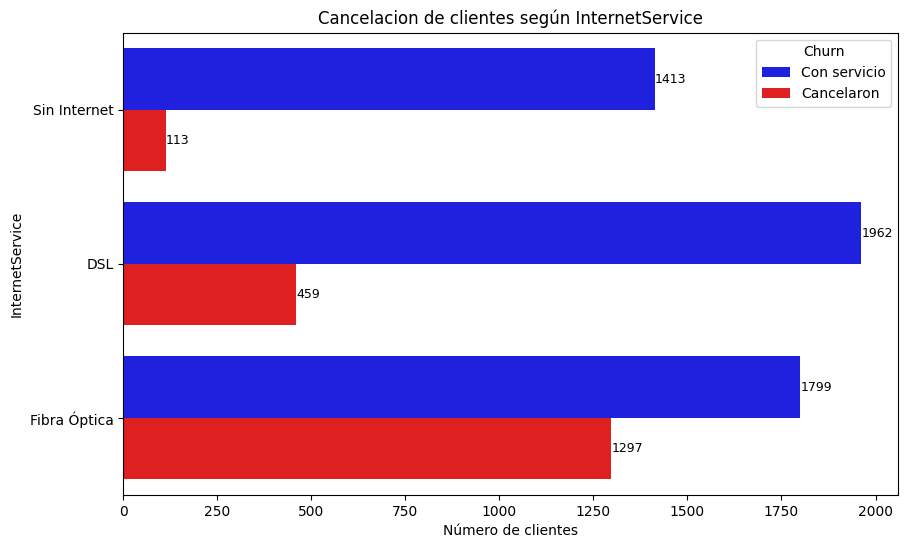


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



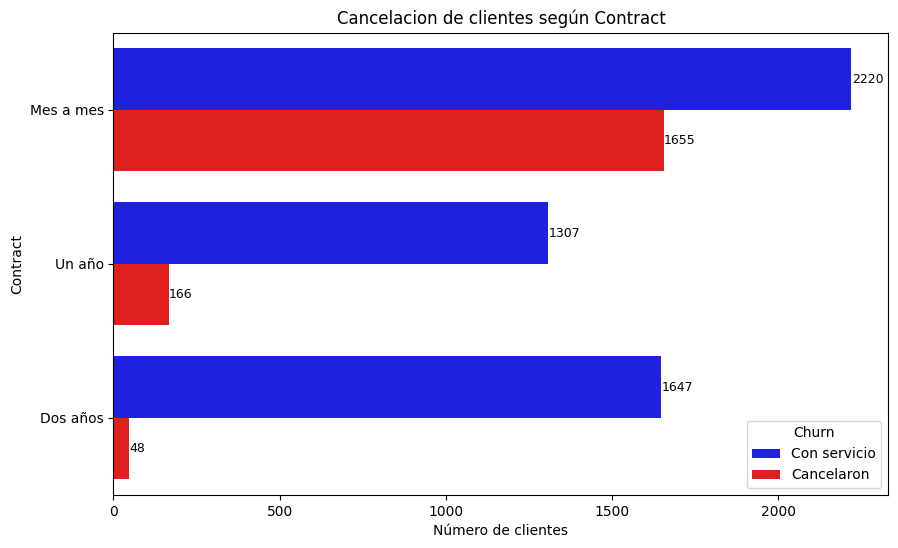


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [ ]:
def plot_churn_by_category(column, labels_dict=None):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.countplot(data=df, y=column, hue='Churn', ax=ax, palette=['blue', 'red'])
    ax.set_title(f'Cancelacion de clientes según {column}')
    ax.set_xlabel('Número de clientes')
    ax.set_ylabel(column)
    ax.legend(title='Churn', labels=['Con servicio', 'Cancelaron'])

    if labels_dict:
        unique_vals = sorted(df[column].unique())
        ax.set_yticks(unique_vals)
        ax.set_yticklabels([labels_dict[val] for val in unique_vals])

    for a in ax.patches:
      width = a.get_width()
      if width > 0:
          ax.text(width + 1, a.get_y() + a.get_height() / 2, int(width), va='center', fontsize=9, color='black')
    fig.savefig(f'{column}.png',transparent=False,dpi=300,bbox_inches='tight')
    plt.show()
    print('\n' + '-'*180 + '\n')

labels_gender = {0: 'Hombre', 1: 'Mujer'}
labels_internet = {0: 'Sin Internet', 1: 'DSL', 2: 'Fibra Óptica'}
labels_contract = {0: 'Mes a mes', 1: 'Un año', 2: 'Dos años'}

plot_churn_by_category('gender', labels_gender)
plot_churn_by_category('InternetService', labels_internet)
plot_churn_by_category('Contract', labels_contract)


###Cantidad de clientes que cancelaron por método de pago

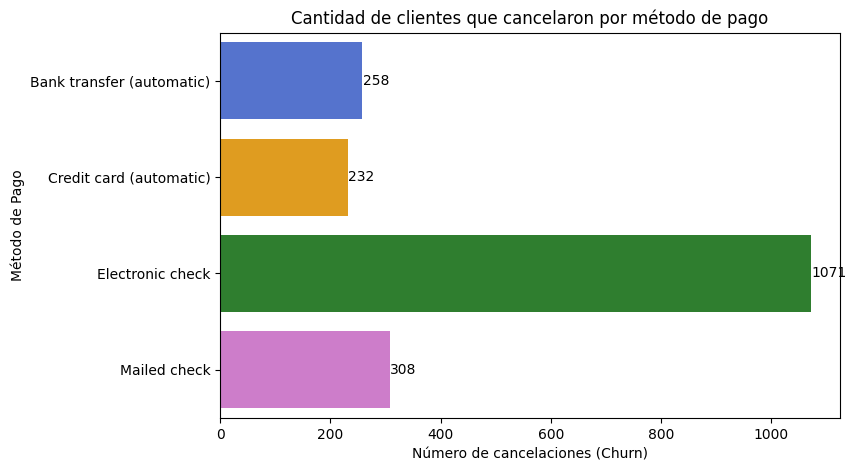

In [ ]:
payment_churn = {
    'Bank transfer (automatic)': df.loc[df['Churn']==1, 'PaymentMethod_bank transfer (automatic)'].sum(),
    'Credit card (automatic)': df.loc[df['Churn']==1, 'PaymentMethod_credit card (automatic)'].sum(),
    'Electronic check': df.loc[df['Churn']==1, 'PaymentMethod_electronic check'].sum(),
    'Mailed check': df.loc[df['Churn']==1, 'PaymentMethod_mailed check'].sum()
}
df_churn = pd.DataFrame(payment_churn.items(), columns=['Método', 'Cancelaciones'])

plt.figure(figsize=(8,5))
sns.barplot(
    x='Cancelaciones',
    y='Método',
    hue='Método',
    data=df_churn,
    orient='h',
    palette=['royalblue','orange','forestgreen','orchid'],
    legend=False
)

for i, v in enumerate(df_churn['Cancelaciones']):
    plt.text(v+1, i, int(v), va='center')

plt.title('Cantidad de clientes que cancelaron por método de pago')
plt.xlabel('Número de cancelaciones (Churn)')
plt.ylabel('Método de Pago')

fig = plt.gcf()
fig.savefig('cancelaciones_por_metodo.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()


###Conteo de evasión por variables numéricas

####Distribución de Cargos Totales por Cancelación

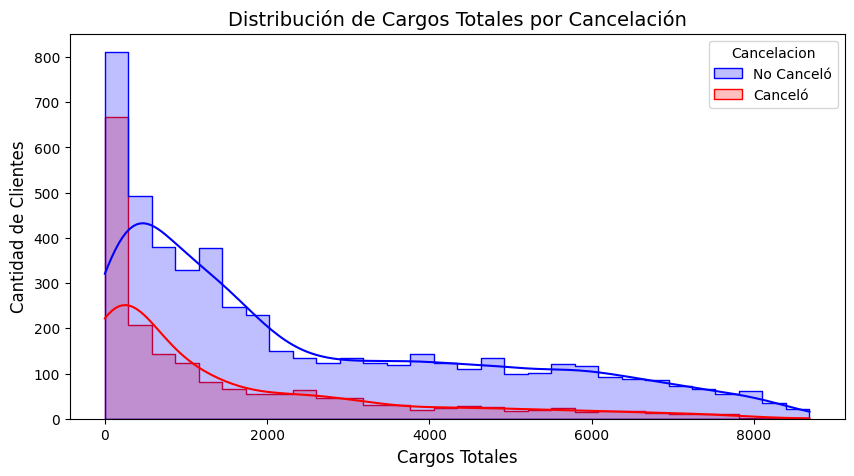

In [ ]:
df['Cancelacion'] = df['Churn'].map({0: 'No Canceló', 1: 'Canceló'})

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='Charges.Total', hue='Cancelacion', kde=True, element="step", ax=ax, palette={'No Canceló':'blue', 'Canceló':'red'}, bins=30)

ax.set_title('Distribución de Cargos Totales por Cancelación', fontsize=14)
ax.set_xlabel('Cargos Totales', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
fig.savefig('cancelacion_por_cargos.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

####Distribución de Tenure(Duracion de contrato) por Cancelación

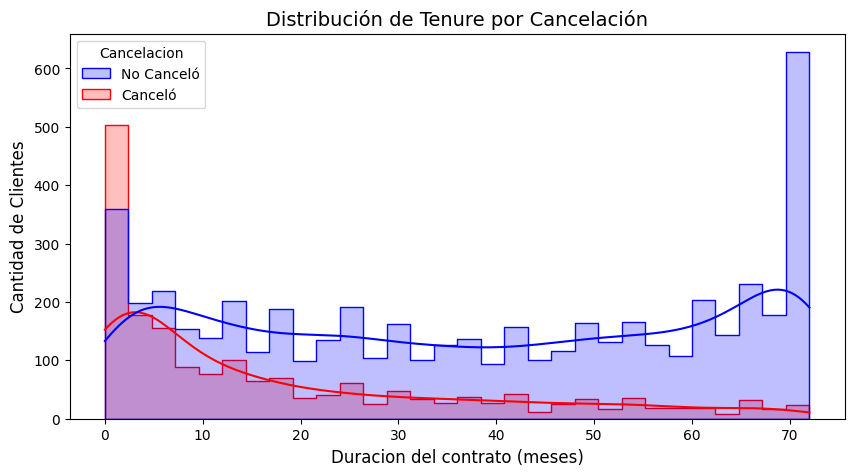

In [ ]:
df['Cancelacion'] = df['Churn'].map({0: 'No Canceló', 1: 'Canceló'})

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='tenure', hue='Cancelacion', kde=True, element="step", ax=ax, palette={'No Canceló':'blue', 'Canceló':'red'}, bins=30)

ax.set_title('Distribución de Tenure por Cancelación', fontsize=14)
ax.set_xlabel('Duracion del contrato (meses)', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
fig.savefig('cancelacion_por_meses.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

Distribución de dias por Cancelación

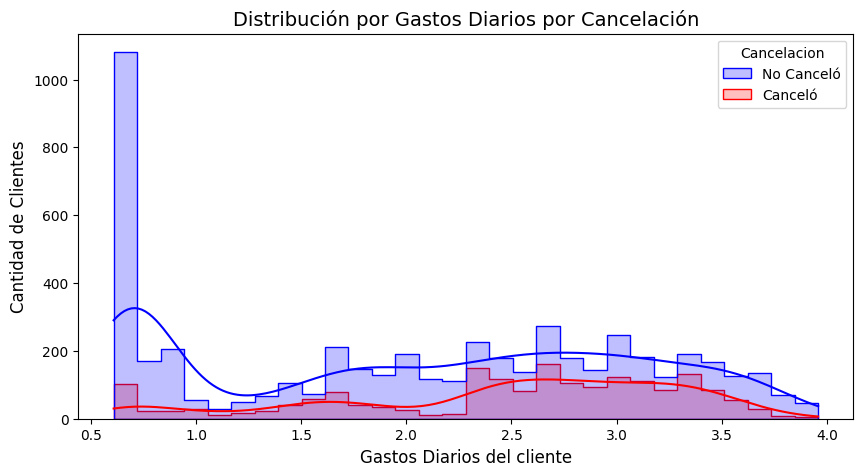

In [ ]:
df['Cancelacion'] = df['Churn'].map({0: 'No Canceló', 1: 'Canceló'})

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='Cuentas_Diarias', hue='Cancelacion', kde=True, element="step", ax=ax, palette={'No Canceló':'blue', 'Canceló':'red'}, bins=30)

ax.set_title('Distribución por Gastos Diarios por Cancelación', fontsize=14)
ax.set_xlabel('Gastos Diarios del cliente', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
fig.savefig('cancelacion_porDias_gastos.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

###Relacion de servicio de internet y Tipo de contrato


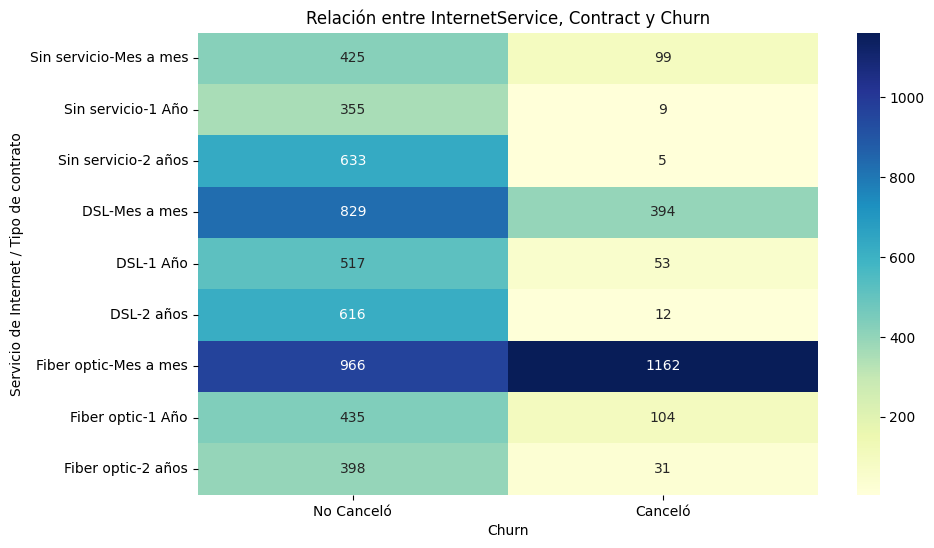

In [ ]:
internet_labels = {0: 'Sin servicio', 1: 'DSL', 2: 'Fiber optic'}
contract_labels = {0: 'Mes a mes', 1: '1 Año', 2: '2 años'}
churn_labels = {0:'No Canceló', 1: 'Canceló'}

tabla = pd.crosstab(
    [df['InternetService'], df['Contract']],
    df['Churn']
)

tabla.index = pd.MultiIndex.from_tuples(
    [(internet_labels[i], contract_labels[c]) for i, c in tabla.index],
    names=['InternetService', 'Contract']
)

tabla.rename(columns=churn_labels, inplace=True)

plt.figure(figsize=(10,6))
sns.heatmap(tabla, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relación entre InternetService, Contract y Churn')
plt.ylabel('Servicio de Internet / Tipo de contrato')
plt.xlabel('Churn')
plt.savefig('relacion_internet_contract_churn.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()


####Relación entre número de "servicios contratados" y "cancelación"



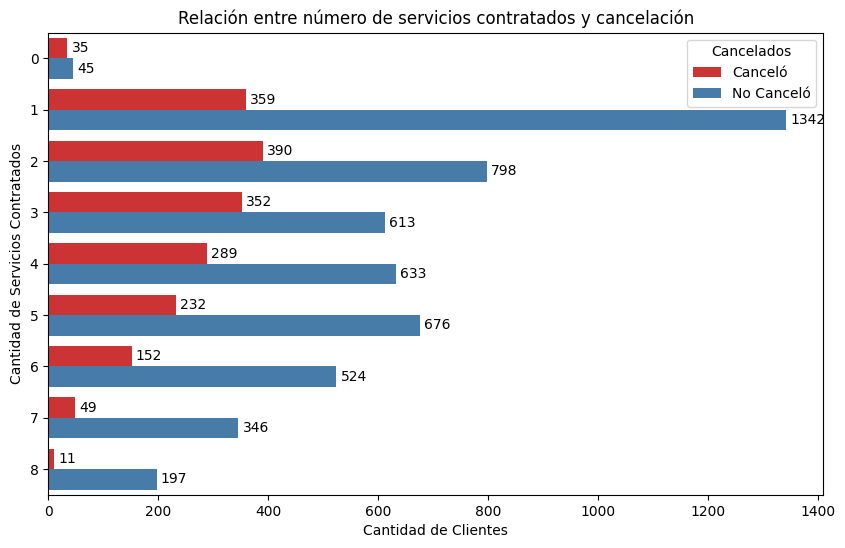

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, y='ServiciosContratados', hue='Cancelacion', palette='Set1')

plt.title('Relación entre número de servicios contratados y cancelación')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Cantidad de Servicios Contratados')
plt.legend(title='Cancelados')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', padding=3)
plt.savefig('servicios_contratados_cancelados.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()


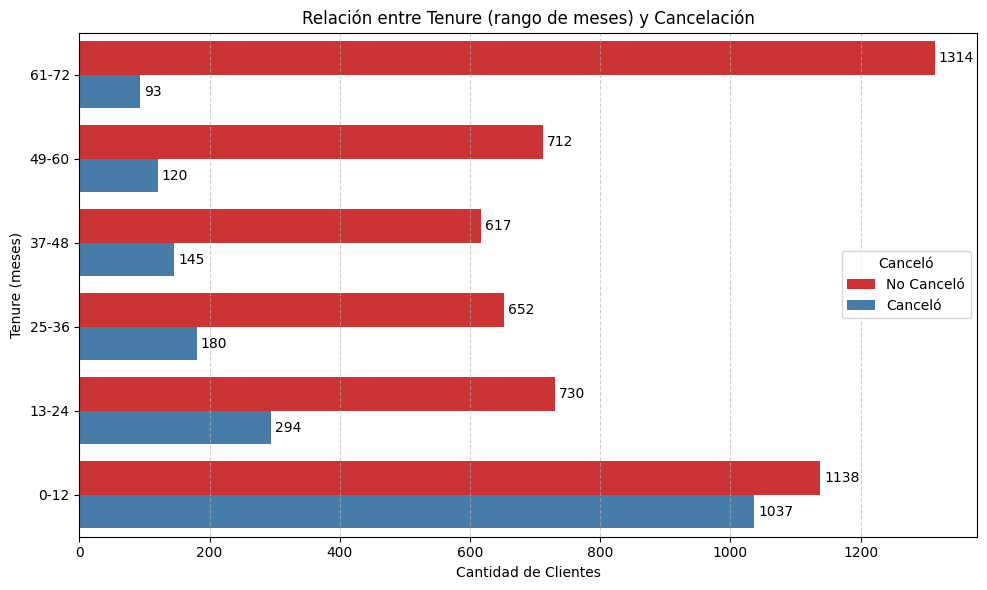

In [ ]:
# Ordenar TenureRango de menor a mayor
orden_tenure = ['61-72', '49-60', '37-48', '25-36', '13-24', '0-12']
df['TenureRango'] = pd.Categorical(df['TenureRango'], categories=orden_tenure, ordered=True)


plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, y='TenureRango', hue='Cancelacion', palette='Set1')

plt.title('Relación entre Tenure (rango de meses) y Cancelación')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Tenure (meses)')
plt.legend(title='Canceló')



for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', padding=3)

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('tenure_cancelados_ordenado.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()


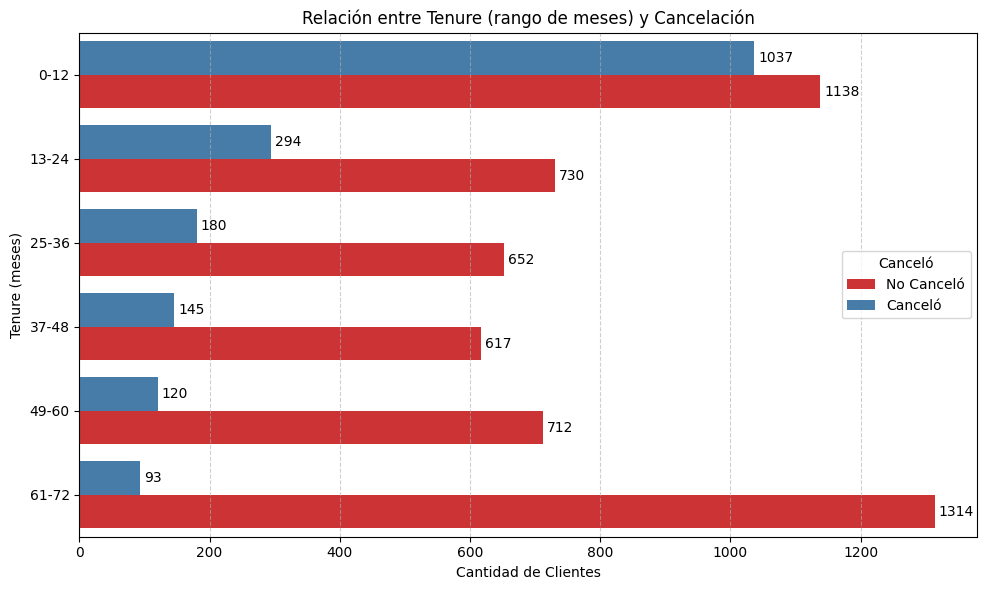

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, y='TenureRango', hue='Cancelacion', palette='Set1')

plt.title('Relación entre Tenure (rango de meses) y Cancelación')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Tenure (meses)')
plt.legend(title='Canceló')

# Invertir orden de labels en eje Y
ax.invert_yaxis()

# Etiquetas de las barras
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', padding=3)

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('tenure_cancelados_invertido.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()


#📄Informe final

##**Introducción**

Se trabaja para TelecomX, la cual se enfrenta una alta tasa de cancelaciones y se necesita comprender el por que, o la razon a la alta pérdida de clientes.

El presente análisis tiene como objetivo identificar las principales causas por las cuales los clientes deciden cancelar sus servicios en TelecomX. A través de un conjunto de datos que contiene información de clientes, servicios contratados, tipo de contrato, método de pago y comportamiento de cancelación, entre muchos otros. Para atender esta necesidad se realizó un análisis exploratorio para obtener hallazgos relevantes que permitan tomar desiciones para que el equipo de Data Science genere  modelos predictivos y desarrollar estrategias para reducir la evasión.

## Reporte de Análisis de Datos

### Principales acciones realizadas:
- 😺 Se trabajó con un DataFrame cargado desde un enlace de GitHub.
- ✅ Verificación y tratamiento de valores nulos dentro de Churn
- 🧹 Eliminación de espacios extra y caracteres no requeridos, al igual que la disminucion de letras mayusculas en columnas strings.  
- 🔢 Transformación de datos numéricos (Charges.Monthly, Charges.Total)
- 📊 Recodificación de variables categóricas (yes y no)
- ➕ Generación de nuevas columnas:
  - `ServiciosContratados`
  - `Cancelacion`
  - `Tipos de Metodo de pagos`



### 📊 Análisis Exploratorio de Datos

#### 📌 Distribución de Cancelaciones:
| Métrica               | Valor    |
|-----------------------|----------|
| Total de clientes     | 7,043    |
| Cancelaron (26.5%)    | 1,869    |
| No cancelaron (73.5%) | 5,174    |


![texto del enlace](https://drive.google.com/uc?id=1H9fBAzCjOBErUW7T3U_yxze6jlNMVTT5)


#### 📌 Cancelaciones por Género:
| Género   | Cancelaron | No Cancelaron |
|----------|------------|---------------|
| Hombres  | 930        | 2,625         |
| Mujeres  | 939        | 2,549         |


**👉 Observación**: No hay diferencias significativas por género.

![texto del enlace](https://drive.google.com/uc?id=1efN7fXgBf2_DXhQ23f4TosRF8Oq5Z2E5)

### 📌 Cancelaciones por Tipo de Internet:
| Tipo de Internet | Cancelaron | No Cancelaron |
|------------------|------------|---------------|
| Fibra Óptica     | 1,297      | 1,799         |
| DSL              | 459        | 1,962         |
| Sin Internet     | 113        | 1,413         |


**👉 Hallazgo**: Fibra Óptica tiene la mayor cantidad de cancelaciones.

![texto del enlace](https://drive.google.com/uc?id=1OlMQ7tGl5I03Sj6eGiUaB8qxurejxK4w)

### 📌 Cancelaciones por Tipo de Contrato:
| Contrato   | Cancelaron | No Cancelaron |
|------------|------------|---------------|
| Mes a Mes  | 1,655      | 2,220         |
| Un Año     | 166        | 1,307         |
| Dos Años   | 48         | 1,647         |

**👉 Hallazgo**: Los contratos mes a mes son los más propensos a cancelar.

![texto del enlace](https://drive.google.com/uc?id=1LgC4ataULVsGE75DD2vCJW-fREc0cY8G)

### 📌 Cancelaciones por Método de Pago:
| Método                   | Cancelaron |
|--------------------------|------------|
| Electronic Check         | 1,071      |
| Bank Transfer (automatic)| 258        |
| Credit Card (automatic)  | 232        |
| Mailed Check             | 308        |

**👉 Hallazgo**: Electronic Check tiene mayor índice de cancelación.

![texto del enlace](https://drive.google.com/uc?id=1cndnRXsP6UcF2kHAfd7Xt9rv_Vn9ZDRm)

### 📌 Servicios Contratados:
| Rango Servicios | Cancelaron | No Cancelaron |
|-----------------|------------|---------------|
| 0-2             | 784        | 2,185         |
| 3-5             | 873        | 1,922         |
| 6-8             | 212        | 1,607         |

![texto del enlace](https://drive.google.com/uc?id=1rIlFA36Mcc_0Ls9DoOauYNRy_v3x2u1A)

### 📌 **Relación con Internet**:  
Fibra Óptica + contrato Mes a Mes = Mayor cancelación (1,162 casos)

![texto del enlace](https://drive.google.com/uc?id=1rYOY2bfVRjG00IDaJi3phOY_dZL0LAwt)

### 📌 Tiempo de Permanencia (tenure):
- 📉 Mayor cancelación en primeros 2 meses
- 📊 Tasa disminuye progresivamente
- 📈 Aumento de clientes activos después de 70 meses

![texto del enlace](https://drive.google.com/uc?id=1_QMEv7CeA8_EG66SWoeLKwUcXvhn_g0w)

## 📌 Conclusiones

Principales causas de cancelación:

| Causa                                  | Evidencia                          |
|----------------------------------------|------------------------------------|
| Contrato Mes a Mes                     | 1,655 de 1,869 cancelaciones      |
| Fibra Óptica + contrato Mes a Mes      | 1,162 cancelaciones               |
| Cancelación en primeros 2 meses        | ~500 cancelaciones                |
| Método Electronic Check                | 1,071 cancelaciones               |
| Menos de 3 servicios contratados       | 749 cancelaciones (rango 0-2)     |



# 🔍Insights Principales
1. La fibra óptica es un "arma de doble filo", apesar de que atrae clientes (42% de cancelaciones vs. 19% en DSL), su alta tasa de churn sugiere problemas ocultos.

Posibles Causas:

- Expectativas no cumplidas (velocidad, estabilidad).

- Se puede decir que el precio es  muy alto en comparacion de la competencia (apoyado por el pico de cancelaciones en el primer mes).

2. El contrato "mes a mes" es el mayor predictor de churn, este representa 42.7% de cancelación vs. ~2.8% en contratos de 2 años.

**Insight: Los clientes con flexibilidad (mes a mes) están "probando" el servicio y/o son sensibles a fallas puntuales.**

3. "Electronic check" es el método de pago más asociado a cancelaciones
Dato impactante: 57% de los que cancelaron usaban este método (vs. ~12-13% en métodos automáticos).

Interpretación: Los pagos manuales requieren mayor esfuerzo del cliente y son recordatorios constantes del servicio.

4. Primeros 60 días = Ventana crítica de retención
Patrón: 500 cancelaciones en meses 1-2 + 650 clientes que pagaron solo 1 mes.

**Insight: La primera experiencia del cliente es decisiva (posible mala onboarding o expectativas mal gestionadas).**

5. Los servicios complementarios reducen churn... pero con un límite
Curiosidad: Quienes tienen 4+ servicios cancelan menos, pero los de 6+ servicios vuelven a subir levemente.

# 1️⃣ Mejorar la Experiencia con Fibra Óptica (Principal causa de bajas)

## ✅ Auditar la calidad del servicio:
- Medir velocidad real vs. lo prometido.
- Detectar zonas con intermitencias o fallas recurrentes.

## ✅ Ofrecer garantías de servicio:
- "Si tu velocidad es menor a X Mbps, te devolvemos el 10% del mes"

## ✅ Paquetes más atractivos:
- Bundles que incluyan streaming (Netflix, Disney+, etc.)
- Combos personalizados según perfil de consumo.

# 2️⃣ Incentivar Contratos a Largo Plazo
*(Actualmente el 42.7% se da de baja en planes "mes a mes")*

## ✅ Ofrecer descuentos por compromiso:
- "Firma por 1 año y obtén 2 meses gratis".
- "Contrato de 2 años con upgrade gratuito a la máxima velocidad".

## ✅ Penalizaciones flexibles por cancelación:
- Permitir salida anticipada pagando solo una parte proporcional.
- Evitar multas fijas que generan malestar.

# 3️⃣ Reducir la Dependencia de "Electronic Check"
*(57% de las cancelaciones vienen de este método)*

## ✅ Promover pagos automáticos con beneficios:
- 5% de descuento por activar pago automático con tarjeta.
- Cero cargos por transferencias bancarias recurrentes.

## ✅ Enviar recordatorios automáticos:
- SMS o email 3 días antes del vencimiento, con un enlace de pago rápido.

# 4️⃣ Programa de Retención en los Primeros 60 Días
*(La ventana crítica donde más se pierden clientes)*

## ✅ Onboarding personalizado:
- Llamada de bienvenida durante la primera semana.
- Guía rápida para configurar su WiFi y aprovechar mejor su servicio.

## ✅ Encuesta de satisfacción al primer mes:
- "¿Cómo calificarías tu experiencia hasta ahora?" (escala 1-10).
- Si puntúa ≤6, brindar soporte prioritario.

## ✅ Oferta de fidelización a los 45 días:
- "Quédate 6 meses más y te regalamos un servicio extra (como backup en la nube)".

# 5️⃣ Optimizar Paquetes de Servicios

## ✅ Evitar saturar al cliente:
- Diseñar paquetes de 3 a 5 servicios (equilibrio entre valor y simplicidad).

## ✅ Personalizar recomendaciones:
- Si el cliente solo quiere internet, no forzarle telefonía o TV.

## ✅ Transparencia total en precios:
- Mostrar comparativas "antes y después" para evitar sorpresas en la factura.

# 6️⃣ Programa de Recompensas para Clientes Antiguos

## ✅ Beneficios por permanencia:
- A los 12 meses: upgrade de velocidad gratuito.
- Descuentos progresivos (ej: -5% cada año).

## ✅ Reconocimiento exclusivo:
- Categoría Cliente VIP: soporte 24/7 y promociones especiales.

# 7️⃣ Monitoreo Proactivo de Señales de Alerta

## 🔍 Detectar clientes en riesgo:
- Bajo uso del servicio después del primer mes.
- Quejas frecuentes en soporte.
- Cambios constantes de plan.

## 🎯 Acciones inmediatas:
- Oferta de retención personalizada:
  - "Vemos que has tenido problemas últimamente, te regalamos 1 mes de soporte premium".